In [75]:
import pandas as pd
import os
import numpy as np

In [76]:
import matplotlib.pyplot as plt

In [77]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split,Subset
torch.manual_seed(1)


In [78]:
from sklearn.model_selection import train_test_split


In [79]:
data =pd.read_csv("data_banknote_authentication.csv", header=None)

In [80]:
data

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [81]:
#data=data.drop("id", axis=1)


In [8]:
#data

In [82]:
train=data.drop(4, axis=1)

In [83]:
target = data[4]

In [84]:
from sklearn.preprocessing import StandardScaler


In [85]:
scaler = StandardScaler()

In [86]:
standered=scaler.fit_transform(train)

In [87]:
train=pd.DataFrame(standered)

In [88]:
class MyDataset(Dataset):

    def __init__(self):       
        
        self.features=train
        self.labels = target
    def __getitem__(self, i):
        feaures=self.features.iloc[i]
        target=self.labels[i]
        return torch.tensor(np.array(feaures)),torch.tensor(np.array(target))
    def __len__(self):
        return len(self.labels)

In [89]:
import torch
import torch.nn as nn
import torch.optim as optim

In [98]:
import torch.nn as nn
import torch 
import torch.nn.functional as f


class Net(nn.Module):
    def __init__(self,outNumber):
        super(Net,self).__init__()
        self.outNumber = outNumber
        
        
    
        self.fc0 = nn.Linear(
            in_features=4, out_features=100 ,bias=True)
        self.depth = 150
        self.linear_layers = []

        self.linear_layers = nn.ModuleList([nn.Linear(
            in_features=100, out_features=100, bias=True) for index in range(self.depth)])
        self.fc = nn.Linear(in_features=100, out_features=self.outNumber, bias=True)
        # self.activation = nn.sigmoid()
    def forward(self, x):
        out = self.fc0(x)
        residual = out
        for index, layer in enumerate(self.linear_layers):
            out = self.linear_layers[index](out)
            out = f.leaky_relu(out)
            # out = f.dropout(out, p=self.droup_out)
            if index % 3 == 0:
                out = out + residual
                residual = out
        out = self.fc(out)
        out = torch.nn.functional.sigmoid(out)
        out = torch.squeeze(out, dim=1)
        return out




In [99]:
net=Net(1)
net=net.cuda()

In [100]:
from sklearn import metrics

In [101]:
def get_accuracy(y_true, y_prob):
    accuracy = metrics.accuracy_score(y_true.cpu().detach().numpy(), y_prob.cpu().detach().numpy() > 0.5)
    return accuracy

In [102]:
dataset_ = MyDataset()
#dataset_ = Subset(dataset_, np.arange(1000000))
# Split into training and test
train_size = int(0.7 * len(dataset_))
test_size = len(dataset_) - train_size


trainset, testset = random_split(dataset_, [train_size, test_size])

# Dataloaders
trainloader = DataLoader(trainset, batch_size=100, shuffle=True)
testloader = DataLoader(testset, batch_size=100, shuffle=False)
criterion=nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=1.0E-5)


In [103]:
import torch # pytorch
from sklearn.preprocessing import LabelEncoder
import torch.optim as optim 
import numpy as np
import torch.nn as nn

class train_:
    def __init__(self,epochs,model,train_dl,val_dl,criterion,optimizer):
        self.model = model
        self.train_dl = train_dl
        self.val_dl = val_dl
        self.criterion = criterion
        self.optimizer = optimizer
        self.epochs = epochs
    def accuracy(self,y_prob,y_true):
        y_prob = y_prob > 0.5
        return (y_true == y_prob).sum().item() / y_true.size(0)    
   # def accuracy(self,predictions, labels):# accuracy function from the resulted predictions
    #    #accuracy = (torch.softmax(predictions, dim=1).argmax(dim=1) == labels).sum().float() / float( labels.size(0) )
     #   accuracy = ((predictions== labels).sum().float() / float( labels.size(0) ))
      #  return accuracy    
    
    def training(self):
        Max_Accu_Val = .0 # start with zero accuracy to compare the results
        lamda = torch.tensor(0.6).type(torch.float).requires_grad_() 
        lamda = torch.tensor(0.6,requires_grad=True, device="cuda")
        self.optimizer2 = optim.Adam([lamda], lr=1E-2)
        error = []
        acctest_=[]
        acctrain_=[]
        
        self.model = self.model.double()
        for e in range(self.epochs): # for every epoch
            CounterTrain =0 # initialize the values with zero, this used to calculate the number of  training epochs
            CounterVal =0  # this used as number of test epochs
            train_loss = 0.0 # initialize the training loss with zero
            TrainAccAll = 0.0 # the summed accuracy for the whole training epoch
            VallAccAll = 0.0 # the summed accuracy of the whole test epoch
            lossTrainAll = 0.0 # the summed loss for the whole training epoch
            lossValAll = 0.0 # the summed loss for the whole test epoch
            lossVarAll=0
            acctest=0
            countertest=0
            lossTestAll=0.0
            self.model.train() 
            
            # signal a training process
            for data, labels in self.train_dl: # for every input and output in train data loader
                self.model.train() 

                if torch.cuda.is_available(): # check if cuda is a vailable
                   data, labels = data.cuda(), labels.cuda() # feed the input and output to cuda
               
                self.optimizer.zero_grad() # zero the gradient, required by pytorch
               
                target = self.model(data.double()) # calculate the input
               #outnorm = [float(i)/max(out) for i in out]

                dataiter = iter(self.val_dl)
                inputsTest, labelsTest  = next(dataiter)
                labelsTest = labelsTest.to("cuda")
                inputsTest = inputsTest.to("cuda")
                self.model.eval() 
                targettest= self.model(inputsTest.double()) 
                
                acctest += self.accuracy(targettest, labelsTest)
                countertest+=1
                
                
                l1 =1# sum(p.abs().sum() for p in self.model.parameters())
                
                lossOriginal = self.criterion(target.double(), labels.double())
              
                loss =lossOriginal#+lamda*l1
                #x = (1/(labels-torch.sqrt(torch.abs(lossOriginal-lamda))+.0000001))-1
                #varout = torch.abs(torch.var(-(x*x-1)/(x+.0000001)))
                #varout =torch.var( -torch.log(torch.abs(1/(labels-torch.sqrt(torch.abs(lossOriginal-lamda)))-1)))
                #varout = torch.var(labels-lossOriginal-lamda)
                #varout =torch.var(-(((1/((-loss+lamda)/(2*labels-1))-1))+(.5*(torch.abs(1/((-loss+lamda)/(2*labels-1))-1))*(torch.abs(1/((-loss+lamda)/(2*labels-1))-1)))))
                #varout=torch.var(((((2*labels/((lossOriginal-lamda*l1)+2*labels+.00001))-1))-1)+.5*((((2*labels/((lossOriginal-lamda*l1)+2*labels+.00001))-1))-1)*((((2*labels/((lossOriginal-lamda*l1)+2*labels+.00001))-1))-1))
                loss.backward(retain_graph=True)# neural network backward calculations
                #self.optimizer2.zero_grad()
                #var_=torch.abs(torch.var(out)-.1*torch.max(out))
                #varout.backward()
                self.optimizer.step() 
                #self.optimizer2.step()
                # optimize
                
                train_loss = lossOriginal.item()# sotre loss values
                TrainAcc = self.accuracy(target.double(),labels.double()) # calculate training accuracy
                CounterTrain+=1 # update training counter
                TrainAccAll +=TrainAcc # update training accuracy the whole epoch
                lossTrainAll += train_loss # update training loss the whole epoch
                #if CounterTrain%5==0:
                if CounterTrain%1==0:
                   # print("lamda",lamda)
                   # print(varout)
                    print("acc Test:", acctest/countertest)
                    print(e,'Training acc',TrainAccAll /CounterTrain,'loss',lossTrainAll/CounterTrain,CounterTrain*50)
                    #traced_cell = torch.jit.trace(self.model,data.double())
                    #traced_cell.save('./atrial_Fib_model.zip')
                    #print("Conerted!")
                
                    error.append(lossTrainAll/CounterTrain)
                    acctest_.append(acctest/countertest)
                    acctrain_.append(TrainAccAll/CounterTrain)   
        return acctest_,acctrain_
                    
                    

In [104]:
tr=train_(500,net,trainloader,testloader,criterion,optimizer)#with lamda

In [105]:
test,tatin=tr.training()#without lamda

acc Test: 0.43
0 Training acc 0.38 loss 0.7079835353923127 50
acc Test: 0.43
0 Training acc 0.445 loss 0.6967071829032097 100
acc Test: 0.43
0 Training acc 0.4566666666666667 loss 0.6949889649153205 150
acc Test: 0.43
0 Training acc 0.42250000000000004 loss 0.7011117945983419 200
acc Test: 0.43
0 Training acc 0.43600000000000005 loss 0.6980354321406768 250
acc Test: 0.43
0 Training acc 0.43 loss 0.6975127353206054 300
acc Test: 0.43000000000000005
0 Training acc 0.4328571428571429 loss 0.6958110324561222 350
acc Test: 0.43125
0 Training acc 0.43375 loss 0.694606753455812 400
acc Test: 0.4366666666666667
0 Training acc 0.4411111111111111 loss 0.6932072309162376 450
acc Test: 0.446
0 Training acc 0.43533333333333335 loss 0.6937413457234481 500
acc Test: 0.54
1 Training acc 0.55 loss 0.6853277762275408 50
acc Test: 0.54
1 Training acc 0.545 loss 0.6817425438257213 100
acc Test: 0.54
1 Training acc 0.59 loss 0.6794598351299065 150
acc Test: 0.5425
1 Training acc 0.5975 loss 0.6800217418785

KeyboardInterrupt: 

In [72]:
testno,tatinon=test,tatin

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline




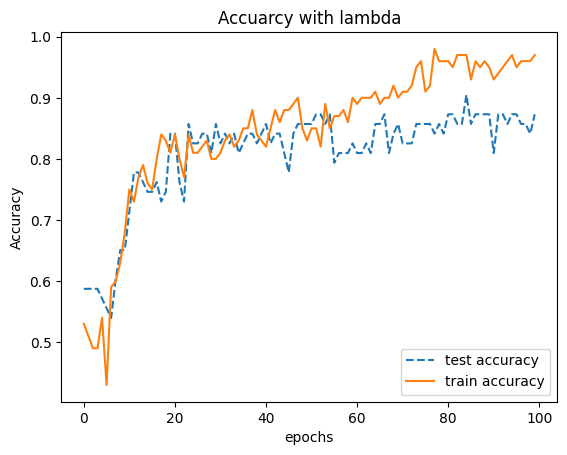

In [74]:
plt.title("Accuarcy with lambda")
plt.plot(test[0:-1:10],label="test accuracy",linestyle='dashed')
plt.plot(tatin[0:-1:10],label="train accuracy")
plt.legend(loc="lower right")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.show()

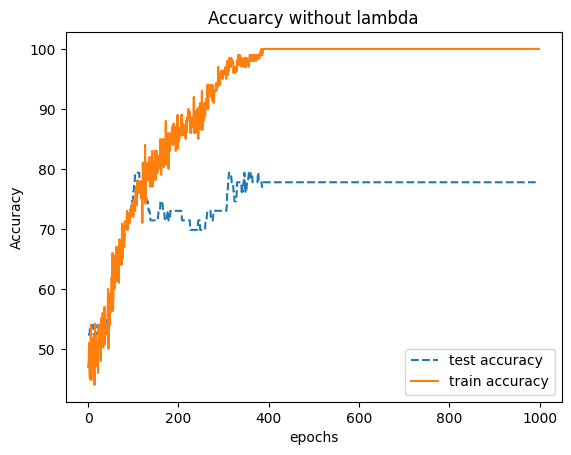

In [64]:
plt.title("Accuarcy without lambda")
plt.plot(np.array(test)*100,label="test accuracy",linestyle='dashed')
plt.plot(np.array(tatin)*100,label="train accuracy")
plt.legend(loc="lower right")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.show()